In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import plotly.express as px

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df = pd.read_csv("data.csv")

In [75]:
df = df.set_index('Country')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

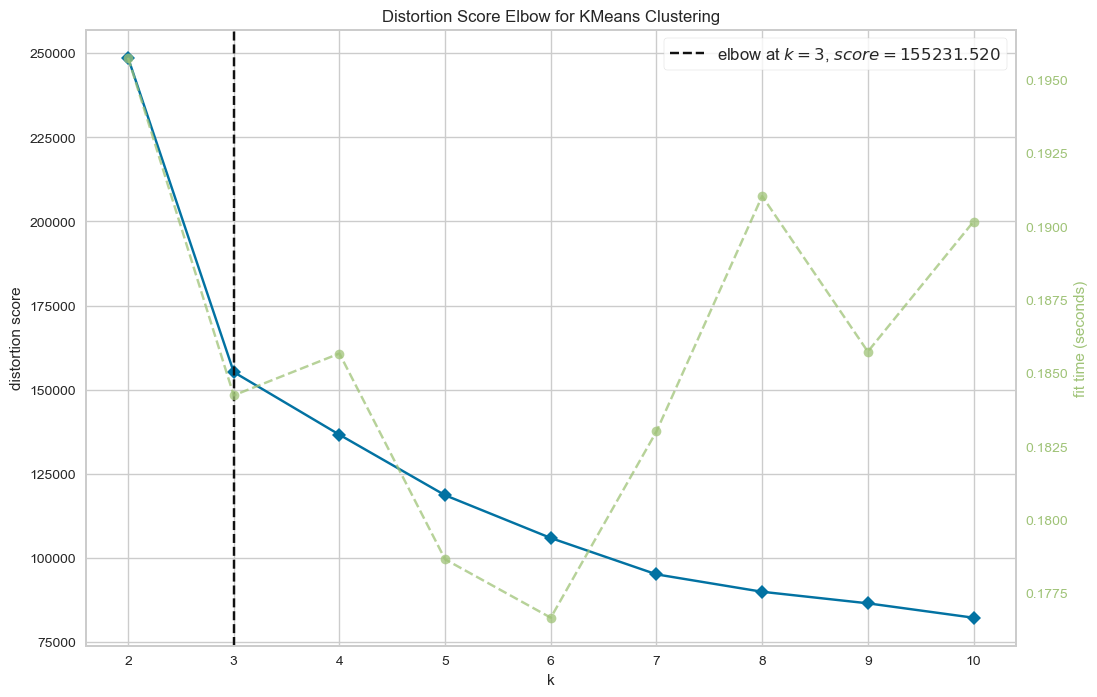

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(df)
elbow_graph.show()

In [61]:
agrupador = KMeans(n_clusters = 3)

In [63]:
# Group into 3 groups, fit and create a variable with the labels
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [65]:
agrupador_kmeans = KMeans(n_clusters = 3)
labels_kmeans = agrupador_kmeans.fit_predict(df)
print("Labels K-means: ", labels_kmeans)

Labels K-means:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [67]:
# Coefficient Silhouette - Score
print("The K-means silhouette coefficient is:", silhouette_score(df, labels_kmeans))

The K-means silhouette coefficient is: 0.38152886366366456


In [69]:
df["cluster"] = labels_kmeans
df.groupby("cluster").describe()

AveragScore                                                          \
              count       mean       std    min    25%    50%    75%    max   
cluster                                                                       
0              69.0  58.715217  4.231192  47.71  55.91  58.56  61.27  66.88   
1              41.0  76.649024  4.683675  68.24  72.99  77.31  80.31  84.55   
2              57.0  43.884737  5.448067  30.40  41.87  44.67  47.87  53.68   

        SafetySecurity             ... Education        NaturalEnvironment  \
                 count       mean  ...       75%    max              count   
cluster                            ...                                       
0                 69.0  68.047101  ...     69.19  81.87               69.0   
1                 41.0  86.537561  ...     85.19  91.44               41.0   
2                 57.0  52.389649  ...     44.52  61.10               57.0   

                                                                 
              mean       std    min    25%    50%    75%    max  
cluster                                                          
0        53.809275  6.674120  40.27  48.56  53.92  58.64  69.35  
1        67.135610  6.309125  53.20  63.23  68.58  71.71  78.74  
2        51.321053  6.483988  33.67  48.46  52.69  56.10  62.22  

[3 rows x 104 columns]

In [71]:
df.reset_index(level=0, inplace=True)

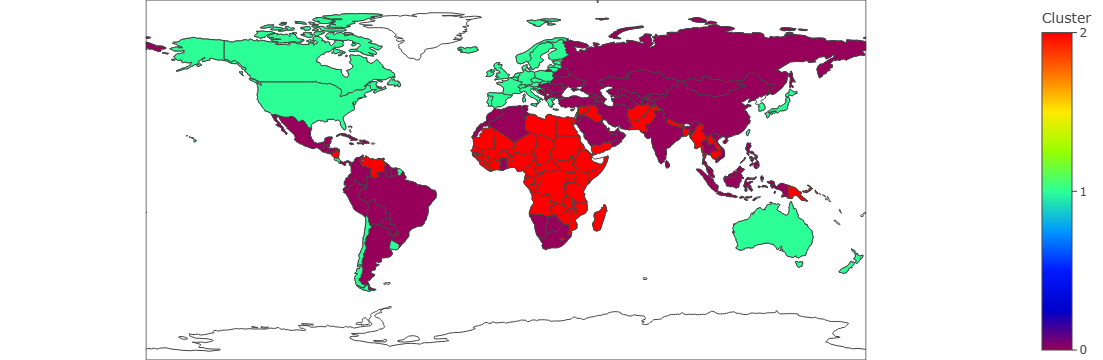

In [73]:
fig = px.choropleth(df,locations='Country', color = 'cluster', locationmode='country names',title = f'Cluster - Choropleth',color_continuous_scale='Rainbow')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = 'Cluster',
    ticks = 'outside',
    tickvals = [0,1,2],
    dtick = 12))
fig.show()